# Use of Open data to prepare the tourist trip to MUC
## Problem Description
When you planning tourist trip, you are often reading reports, suggestions and have expectations about points of interest to visit. As long as some point of interest is nearby, the priority can be suddenly changed. Sometimes you or your kids need WC, or wifi. Sometimes you can decide to go for lunch befor visiting POI. Sometimes you spend less time at POI and still have several hours free. You want to discover what is nearby. Are there same sightseeing points or kids playgroud.

Open data is the idea that some data should be freely available to everyone to use and republish as they wish, without restrictions from copyright, patents or other mechanisms of control. Many gorvernment and city authorities publish open data related to the country, city or region. While digging into these data sources it is possible to enrich normal tour guides and recomendations. In this project we will try to help different categories of tourist travelers to find places, like WiFi hotspots, Markets, Kids playgrounds, Sites around Isar river and Public WCs using Open Data and APIs like FourSquare.

## Datasources
Foursquare API https://developer.foursquare.com

POI at Isar River with coordinates https://www.opengov-muenchen.de/dataset/points-of-interest-an-der-sudlichen-isar/resource/6fb56066-11b2-498d-ba22-cbcc85b660b4

Public Wifi https://www.opengov-muenchen.de/dataset/m-wlan-hotspots/resource/4ac5b616-ebbf-4857-ae79-43369d6c4c87

Public Playgrounds https://www.opengov-muenchen.de/dataset/oeffentliche-spielplaetze-muenchen/resource/845ce3bd-ea80-4623-b51d-a30680175c22

Oktoberfest data inkluding beer and fried chiken price over the years https://www.opengov-muenchen.de/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2?view_id=e619eb4d-fc3b-44cc-88ea-0086d710ee1f

Location of Markets https://www.opengov-muenchen.de/dataset/maerkte/resource/f5608df8-43d3-4575-9bce-4fdb810bb516

Museums Visitors https://www.opengov-muenchen.de/dataset/monatszahlen-museen/resource/6c6a809e-91ee-4f3e-9268-a8b7bc38311c

Public Toilets https://www.opengov-muenchen.de/dataset/offentliche-toiletten-der-landeshauptstadt-muenchen



## Implementation


In [4]:
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages")

In [26]:
# Loading libraries

#Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import requests
import lxml.html as lh
from geopy.geocoders import Nominatim
import json
from pandas.io.json import json_normalize
import folium
import bs4 as bs
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
import matplotlib.pyplot as plt





In [80]:
import time

In [561]:
# Tokens and credentials


# Foursquare auth 
CLIENT_ID = 'RF524W1BATHEREISSOMETHINGHERETWCFSGLEYMZ'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'IXOJHF0SOMETHINGHERETOOT5WXI0WWZA0'# 'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RF524W1BATHEREISSOMETHINGHERETWCFSGLEYMZ
CLIENT_SECRET:IXOJHF0SOMETHINGHERETOOT5WXI0WWZA0


In [198]:
# Loading Data sources
# Foursquare API https://developer.foursquare.com

address = 'Karlsplatz 1, 80335 Munich'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
muc_ct_latitude = latitude
muc_ct_longitude = longitude




48.1400615 11.5670315


In [29]:
# POI at Isar River with coordinates 
# https://www.opengov-muenchen.de/dataset/points-of-interest-an-der-sudlichen-isar/resource/6fb56066-11b2-498d-ba22-cbcc85b660b4
Isar_POI_URL = 'https://www.opengov-muenchen.de/dataset/fc28edb7-0e69-47b2-814e-3fa18c68f94f/resource/6fb56066-11b2-498d-ba22-cbcc85b660b4/download/pois-an-der-isar-2016-08-09.csv'
isar_data = pd.read_csv(Isar_POI_URL)
print(len(isar_data))
isar_data.head()

44


,type,title,latitude,longitude,description,photo_url,photo_credit,url_website
0,bruecke,Braunauer Eisenbahnbrücke,48.118377,11.561661,Wurde für die Eisenbahnlinie zwischen München ...,https://res.cloudinary.com/muenchen/isar-map/i...,Baureferat,http://orte.muenchen.de/1255494.html
1,bruecke,Brudermühlbrücke,48.112607,11.560013,Entstand durch Versetzung der alten Wittelsbac...,https://res.cloudinary.com/muenchen/isar-map/i...,Baureferat,http://orte.muenchen.de/1255509.html
2,bruecke,Corneliusbrücke,48.128557,11.580125,Wurde entweder nach dem Maler und Direktor der...,https://res.cloudinary.com/muenchen/isar-map/i...,Baureferat,https://www.muenchen.de/sehenswuerdigkeiten/or...
3,bruecke,Flauchersteg,48.104606,11.553159,"Wurde 1914 zu einem soliden, von Betonpfeilern...",https://res.cloudinary.com/muenchen/isar-map/i...,Baureferat,http://orte.muenchen.de/1255470.html
4,bruecke,Föhringer Eisenbahnbrücke,48.183747,11.631017,War schon beim Bau 1907 mit einem Gleis auf de...,https://res.cloudinary.com/muenchen/isar-map/i...,Baureferat,NaN


In [30]:
# Public Wifi 
# https://www.opengov-muenchen.de/dataset/m-wlan-hotspots/resource/4ac5b616-ebbf-4857-ae79-43369d6c4c87

Public_WIFI_URL = 'https://www.opengov-muenchen.de/dataset/2f256473-423d-4c3d-846c-09977aa31205/resource/4ac5b616-ebbf-4857-ae79-43369d6c4c87/download/m-wlan2015-01-21.csv'
wifi_data = pd.read_csv(Public_WIFI_URL)
print(len(wifi_data))
wifi_data.head()


21


,Platz,Acess Point,latitude,longitude
0,Odeonsplatz,AP_1,48.142361,11.577892
1,Odeonsplatz,AP_2,48.142429,11.577247
2,Odeonsplatz,AP_4,48.142609,11.578021
3,Sendlinger Tor,AP_1,48.133764,11.566767
4,Sendlinger Tor,AP_2,48.133906,11.567297


In [31]:
# Public Playgrounds 
# https://www.opengov-muenchen.de/dataset/oeffentliche-spielplaetze-muenchen/resource/845ce3bd-ea80-4623-b51d-a30680175c22
Public_Playgrounds_URL = 'https://www.opengov-muenchen.de/dataset/0760ce3a-fef8-43e4-888f-8cc92fdf56de/resource/845ce3bd-ea80-4623-b51d-a30680175c22/download/spielplaetzemuenchenohneleerespalten2016-06-13.csv'
playground_data = pd.read_csv(Public_Playgrounds_URL)
print(len(playground_data))
playground_data.head()

729


,adress_id,bezeichnung,latitude,longitude,service_id,service_kfz_parkplaetze_fuer_behinderte,service_hilfen_fuer_gehbehinderte,service_hilfen_fuer_sehbehinderte,service_hilfen_fuer_gehoerlose_und_schwerhoerige_menschen,service_bezeichnung,service_anzeigename,service_beschreibung,service_kurzbeschreibung,besondere_angebote,sonstige_angebote,altersgruppe,weitere_informationen,Unnamed: 17
0,﻿10100152,"Spielplatz ""Schwere-Reiter-Str. Ecke Ackermann...",48.163481,11.552318,10100153,Nein,Nein,Nein,Nein,Service Spielplatz,"Spielplatz ""Schwere-Reiter-Str. Ecke Ackermann...",NaN,NaN,Skateanlage,NaN,Jugendliche,http://www.muenchen.de/dienstleistungsfinder/m...,NaN
1,10101944,"Fitness Parcours "" Südpark """,48.104765,11.507671,10101945,Nein,Nein,Nein,Nein,Service Spielplatz,"Fitness Parcours "" Südpark """,NaN,NaN,Fitness Parcours,NaN,Erwachsene\nJugendliche,http://www.muenchen.de/dienstleistungsfinder/m...,NaN
2,10101948,"Fitness Parcours "" Feldmochinger See """,48.215524,11.513373,10101949,Nein,Nein,Nein,Nein,Service Spielplatz,"Fitness Parcours "" Feldmochinger See """,NaN,NaN,Fitness Parcours,NaN,Erwachsene\nJugendliche,http://www.muenchen.de/dienstleistungsfinder/m...,NaN
3,10101950,"Fitness Parcours "" Merseburger Straße """,48.187803,11.516682,10101951,Nein,Nein,Nein,Nein,Service Spielplatz,"Fitness Parcours "" Merseburger Straße""",NaN,NaN,Fitness Parcours,NaN,Jugendliche\nErwachsene,http://www.muenchen.de/dienstleistungsfinder/m...,NaN
4,10101952,"Fitness Parcours "" Hogenbergplatz """,48.136959,11.507236,10101953,Nein,Nein,Nein,Nein,Service Spielplatz,"Fitness Parcours "" Hogenbergplatz """,NaN,NaN,Fitness Parcours,NaN,Jugendliche\nErwachsene,http://www.muenchen.de/dienstleistungsfinder/m...,NaN


In [32]:
# Oktoberfest data inkluding beer and fried chiken price over the years 
# https://www.opengov-muenchen.de/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2?view_id=e619eb4d-fc3b-44cc-88ea-0086d710ee1f

Oktoberfest_URL = 'https://www.opengov-muenchen.de/dataset/8d6c8251-7956-4f92-8c96-f79106aab828/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2/download/oktoberfestgesamt19852018.csv'
oktoberfest_data = pd.read_csv(Oktoberfest_URL)
print(len(oktoberfest_data))
oktoberfest_data.head()



34


,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


In [52]:
# Coordinates of Oktoberfest
address = 'Theresienwiese, Bavariaring, 80336 München'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.1358538 11.5495032


In [33]:
# Location of Markets 
# https://www.opengov-muenchen.de/dataset/maerkte/resource/f5608df8-43d3-4575-9bce-4fdb810bb516
Location_Of_Markets_URL = 'https://www.opengov-muenchen.de/dataset/04eda73a-173f-43c4-abb4-3b3166c3f356/resource/f5608df8-43d3-4575-9bce-4fdb810bb516/download/141212lhmmaerktealleattribute.csv'
markets_data = pd.read_csv(Location_Of_Markets_URL, sep = ';')
print(len(markets_data))
markets_data.head()

51


,xcoord,ycoord,fid,ogr_fid,etyp,ebene,faktor,winkel,name,inhalt,adresse,link,lebenslage,rubrik,gemeinde,admplayer,admpblock,latitude,longitude
0,4465788.32,5331456.22,0,34751,SY,309,1,90,WMARKT,Untersendling,Margaretenplatz,http://www.muenchen.de/rathaus/Stadtverwaltung...,Einkaufen und Dienstleistungen,Wochenmarkt,Landeshauptstadt München,KART_SYMBOL,WMARKT,48.121145,11.540421
1,4464188.72,5326632.74,1,34752,SY,309,1,90,WMARKT,Solln,Fellerer Platz,http://www.muenchen.de/rathaus/Stadtverwaltung...,Einkaufen und Dienstleistungen,Wochenmarkt,Landeshauptstadt München,KART_SYMBOL,WMARKT,48.077675,11.519338
2,4457992.57,5334652.99,2,34753,SY,309,1,90,WMARKT,Neuaubing,Mainaustraße 67-73,http://www.muenchen.de/rathaus/Stadtverwaltung...,Einkaufen und Dienstleistungen,Wochenmarkt,Landeshauptstadt München,KART_SYMBOL,WMARKT,48.149431,11.435387
3,4469672.14,5330271.84,3,34754,SY,309,1,90,WMARKT,Giesing,Perlacher Straße 111 - 119,http://www.muenchen.de/rathaus/Stadtverwaltung...,Einkaufen und Dienstleistungen,Wochenmarkt,Landeshauptstadt München,KART_SYMBOL,WMARKT,48.110690,11.592677
4,4461389.89,5328035.46,4,34755,SY,309,1,90,WMARKT,Fürstenried-West,Graubündener Straße (Schweizer Platz),http://www.muenchen.de/rathaus/Stadtverwaltung...,Einkaufen und Dienstleistungen,Wochenmarkt,Landeshauptstadt München,KART_SYMBOL,WMARKT,48.090127,11.481647


In [54]:
# Museums Visitors 
# https://www.opengov-muenchen.de/dataset/monatszahlen-museen/resource/6c6a809e-91ee-4f3e-9268-a8b7bc38311c
Museums_Visitors_URL = 'https://www.opengov-muenchen.de/dataset/bfb4a286-bea5-4bfe-82ce-b9bd354284a5/resource/6c6a809e-91ee-4f3e-9268-a8b7bc38311c/download/monatszahlen1810museen.csv'

museums_data = pd.read_csv(Museums_Visitors_URL)
print(len(museums_data))
museums_data.head()



2005


,ZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher/innen,Alte Pinakothek,2016,201612,15503.0,15344.0,11.89,1.04,15833.0
1,Besucher/innen,Alte Pinakothek,2016,201611,13856.0,13584.0,-20.81,2.00,15820.0
2,Besucher/innen,Alte Pinakothek,2016,201610,17498.0,22501.0,47.40,-22.23,15797.0
3,Besucher/innen,Alte Pinakothek,2016,201609,11871.0,18027.0,-35.57,-34.15,16214.0
4,Besucher/innen,Alte Pinakothek,2016,201608,18425.0,23021.0,-4.83,-19.96,16727.0


In [68]:
# !!! Show unique museums and find their coordinates

# Get unique museum list
munique=museums_data.AUSPRAEGUNG.unique()

munique

array(['Alte Pinakothek', 'Bayerisches Nationalmuseum',
       'Deutsches Museum - Museumsinsel',
       'Deutsches Museum - Verkehrszentrum ', 'Münchner Stadtmuseum',
       'Museum Brandhorst', 'Museum Mensch und Natur', 'Neue Pinakothek',
       'Pinakothek der Moderne', 'Schackgalerie',
       'Städtische Galerie im Lenbachhaus'], dtype=object)

### Adding Museums coordinates using Foursquare API

In [114]:
# Feeding Museum addresses and trying to get coordinates

museum_addresses = pd.DataFrame({'POI_Name': ['Alte Pinakothek', 'Bayerisches Nationalmuseum','Deutsches Museum - Museumsinsel','Deutsches Museum - Verkehrszentrum ', 'Münchner Stadtmuseum','Museum Brandhorst', 'Museum Mensch und Natur', 'Neue Pinakothek','Pinakothek der Moderne', 'Schackgalerie','Städtische Galerie im Lenbachhaus'],
                                'POI_Address': ['Barer Str. 27, 80333 München', 'Prinzregentenstraße 3, 80538 München','Museumsinsel 1, 80538 München', 'Am Bavariapark 5, 80339 München', 'Sankt-Jakobs-Platz 1, 80331 München', 'Theresienstraße 35a, 80333 München', 'Schloß Nymphenburg, 80638 München', 'Barer Str. 29, 80799 München', 'Barer Str. 40, 80333 München', 'Prinzregentenstraße 9, 80538 München', 'Luisenstraße 33, 80333 München']
                                })
museum_addresses["POI_Type"] = "Museum"
museum_addresses["latitude"] = np.nan
museum_addresses["longitude"] = np.nan
#columns = ["POI_Type", "POI_Name", "POI_Address", "latitude", "longitude"]
# Collecting coordinates 
for index, row in museum_addresses.iterrows():
   
    address = row['POI_Address'] 
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(row['POI_Name'], ": ", latitude, longitude)
#    time.sleep(7)
    museum_addresses.at[index, "latitude"] = latitude
    museum_addresses.at[index, "longitude"] = longitude
    


museum_addresses
poi_locations = museum_addresses.copy()
poi_locations 

Alte Pinakothek :  48.1482861 11.569970904087043
Bayerisches Nationalmuseum :  48.1433855 11.5911498
Deutsches Museum - Museumsinsel :  48.13003865 11.582888488551909
Deutsches Museum - Verkehrszentrum  :  48.1325395 11.5429532
Münchner Stadtmuseum :  48.1351603 11.572607585081988
Museum Brandhorst :  48.1476318 11.57385874695941
Museum Mensch und Natur :  48.15908585 11.51166615
Neue Pinakothek :  48.1499278 11.570937445883057
Pinakothek der Moderne :  48.14716025 11.572227101401982
Schackgalerie :  48.14250955 11.593434725593049
Städtische Galerie im Lenbachhaus :  48.1466458 11.5633122
48.1358538 11.5495032


,POI_Name,POI_Address,POI_Type,latitude,longitude
0,Alte Pinakothek,"Barer Str. 27, 80333 München",Museum,48.148286,11.569971
1,Bayerisches Nationalmuseum,"Prinzregentenstraße 3, 80538 München",Museum,48.143386,11.591150
2,Deutsches Museum - Museumsinsel,"Museumsinsel 1, 80538 München",Museum,48.130039,11.582888
3,Deutsches Museum - Verkehrszentrum,"Am Bavariapark 5, 80339 München",Museum,48.132540,11.542953
4,Münchner Stadtmuseum,"Sankt-Jakobs-Platz 1, 80331 München",Museum,48.135160,11.572608
5,Museum Brandhorst,"Theresienstraße 35a, 80333 München",Museum,48.147632,11.573859
6,Museum Mensch und Natur,"Schloß Nymphenburg, 80638 München",Museum,48.159086,11.511666
7,Neue Pinakothek,"Barer Str. 29, 80799 München",Museum,48.149928,11.570937
8,Pinakothek der Moderne,"Barer Str. 40, 80333 München",Museum,48.147160,11.572227
9,Schackgalerie,"Prinzregentenstraße 9, 80538 München",Museum,48.142510,11.593435


In [116]:
# save to avoid API overload
museum_addresses.to_csv("museums_coordinates.csv", sep = '\t')




In [185]:

# Coordinates of Oktoberfest
address = 'Theresienwiese, Bavariaring, 80336 München'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


48.1358538 11.5495032


## Making single list with POIs coordinates


In [186]:
print(latitude, longitude)

# Adding Museums
poi_locations = museum_addresses.copy()
#oktf = pd.DataFrame(columns = ("POI_Type", "POI_Name", "POI_Address", "latitude", "longitude"))
# Adding Oktoberfest venue
poi_locations= poi_locations.append([{"POI_Type": "Festival", "POI_Name": "Oktoberfest", "POI_Address": address, "latitude" : latitude, "longitude": longitude}])
poi_locations



48.1358538 11.5495032


,POI_Name,POI_Address,POI_Type,latitude,longitude
0,Alte Pinakothek,"Barer Str. 27, 80333 München",Museum,48.148286,11.569971
1,Bayerisches Nationalmuseum,"Prinzregentenstraße 3, 80538 München",Museum,48.143386,11.591150
2,Deutsches Museum - Museumsinsel,"Museumsinsel 1, 80538 München",Museum,48.130039,11.582888
3,Deutsches Museum - Verkehrszentrum,"Am Bavariapark 5, 80339 München",Museum,48.132540,11.542953
4,Münchner Stadtmuseum,"Sankt-Jakobs-Platz 1, 80331 München",Museum,48.135160,11.572608
5,Museum Brandhorst,"Theresienstraße 35a, 80333 München",Museum,48.147632,11.573859
6,Museum Mensch und Natur,"Schloß Nymphenburg, 80638 München",Museum,48.159086,11.511666
7,Neue Pinakothek,"Barer Str. 29, 80799 München",Museum,48.149928,11.570937
8,Pinakothek der Moderne,"Barer Str. 40, 80333 München",Museum,48.147160,11.572227
9,Schackgalerie,"Prinzregentenstraße 9, 80538 München",Museum,48.142510,11.593435


In [42]:
# Public Toilets 
# https://www.opengov-muenchen.de/dataset/offentliche-toiletten-der-landeshauptstadt-muenchen
Public_Toilets_URL = 'https://www.opengov-muenchen.de/dataset/6d8552a7-328c-48a2-ab37-5f9caa2bfbdb/resource/cc327030-a5e4-4a27-8a99-aaa8a5ab6200/download/oeffentlichetoilettenmuenchen2016-06-28.csv'

wc_data = pd.read_csv(Public_Toilets_URL, sep = '\t')
print(len(wc_data))
wc_data.head()


134


,address_id,address_organisation,address_organisationsbereich,bezeichnung,address_strasse,address_hausnummer,address_postleitzahl,address_ort,latitude,longitude,service_id,service_email,service_oeffnungszeiten,service_barrierefreiheit_anmerkung,service_bezeichnung,service_anzeigename,service_beschreibung,service_kurzbeschreibung,gebuehren,betreiber,duschen,wickelraeume
0,﻿101010,Landeshauptstadt München,Referat für Gesundheit und Umwelt,Neuer Südfriedhof,Hochaeckerstr.,90,81737.0,München,48.100595,11.622406,10176177,neuer-suedfriedhof@muenchen.de,während der Öffnungszeiten des Friedhofs,NaN,"Öffentliche Toilette ""Neuer Südfriedhof""","Öffentliche Toilette ""Neuer Südfriedhof""",NaN,NaN,gebührenfrei,Landeshauptstadt München,False,False
1,10198309,Landeshauptstadt München,MTG,"Öffentliche Toilette ""Lorettoplatz""",Lorettoplatz,NaN,NaN,NaN,48.103475,11.489038,10198310,info@muenchner-toiletten.de,"Täglich, 06.00-24.00 Uhr",NaN,"Öffentliche Toilette ""Lorettoplatz""","Öffentliche Toilette ""Lorettoplatz""",NaN,NaN,gebührenfrei,Münchner Toiletten GmbH,False,False
2,10198354,Landeshauptstadt München,Kommunalreferat,"Öffentliche Toilette ""Bavariaring 5""",Bavariaring,5,NaN,NaN,48.136390,11.549850,10198355,kroell@hansimglueck-franchise.de,nur während Oktoberfest geöffnet,NaN,"Öffentliche Toilette ""Bavariaring 5""","Öffentliche Toilette ""Bavariaring 5""",NaN,Diese Toilette ist nur während des Oktoberfest...,gebührenpflichtig,Privater Betreiber,False,False
3,10198358,Landeshauptstadt München,Baureferat,Öffentliche Toilettenkabine Isarauen,westl. Marienklausenbrücke,NaN,NaN,NaN,48.092270,11.547886,10198359,NaN,nicht bei Hochwasser,NaN,"Öffentliche Toilettenkabine Isarauen ""westl. M...","Öffentliche Toilettenkabine Isarauen ""westl. M...",NaN,NaN,gebührenfrei,Landeshauptstadt München,False,False
4,10198360,Landeshauptstadt München,Baureferat,Öffentliche Toilettenkabine Isarauen,Floßlände,NaN,NaN,NaN,48.095602,11.544367,10198361,NaN,nur während Floßsaison,NaN,"Öffentliche Toilettenkabine Isarauen ""Floßlände""","Öffentliche Toilettenkabine Isarauen ""Floßlände""",NaN,nur während Floßsaison,gebührenfrei,Landeshauptstadt München,False,False


### Checking WCs with Douche and Baby Changing rooms


In [50]:
# Toilets with douche
wc_douche_data= wc_data[wc_data.duschen == True].copy()
print(len(wc_data))
print(len(wc_douche_data))
wc_douche_data.head()

# Probably No chance :-(

134
0


,address_id,address_organisation,address_organisationsbereich,bezeichnung,address_strasse,address_hausnummer,address_postleitzahl,address_ort,latitude,longitude,service_id,service_email,service_oeffnungszeiten,service_barrierefreiheit_anmerkung,service_bezeichnung,service_anzeigename,service_beschreibung,service_kurzbeschreibung,gebuehren,betreiber,duschen,wickelraeume


In [51]:
# baby changing rooms


wc_bcr_data= wc_data[wc_data.wickelraeume == True].copy()
print(len(wc_data))
print(len(wc_bcr_data))
wc_bcr_data.head()


134
3


,address_id,address_organisation,address_organisationsbereich,bezeichnung,address_strasse,address_hausnummer,address_postleitzahl,address_ort,latitude,longitude,service_id,service_email,service_oeffnungszeiten,service_barrierefreiheit_anmerkung,service_bezeichnung,service_anzeigename,service_beschreibung,service_kurzbeschreibung,gebuehren,betreiber,duschen,wickelraeume
82,1065675,Landeshauptstadt München,MTG,"Öffentliche Toilette ""Marienplatz (im S- u. U-...",NaN,NaN,NaN,NaN,48.136870,11.576317,1065676,info@muenchner-toiletten.de,"Täglich, 06.00-24.00 Uhr",Barrierefrei zugänglich (Aufzug) - separates B...,"Öffentliche Toilette ""Marienplatz (im S- u. U-...","Öffentliche Toilette ""Marienplatz (im S- u. U-...",mit separatem Behinderten-WC,"""Standard Stiftung Leben pur""",gebührenpflichtig,Münchner Toiletten GmbH,False,True
83,1065677,Landeshauptstadt München,MTG,"Öffentliche Toilette ""Marienplatz Neues Rathau...",NaN,NaN,NaN,NaN,48.137848,11.575651,1065678,info@muenchner-toiletten.de,"Mo-Fr 08:00-21:00, Sa 09:00-20:00, So 10:00-20...",Barrierefrei zugänglich - separates Behinderte...,"Öffentliche Toilette ""Marienplatz Neues Rathau...","Öffentliche Toilette ""Marienplatz Neues Rathau...",mit separatem Behinderten-WC,NaN,gebührenpflichtig,Münchner Toiletten GmbH,False,True
88,1065687,Landeshauptstadt München,MTG,"Öffentliche Toilette ""Münchner Freiheit (im U-...",NaN,NaN,NaN,NaN,48.162375,11.586243,1065688,info@muenchner-toiletten.de,"Täglich, 06.00-24.00 Uhr",Barrierefrei zugänglich (Rampe und Aufzug) - s...,"Öffentliche Toilette ""Münchner Freiheit (im U-...","Öffentliche Toilette ""Münchner Freiheit (im U-...",mit separatem Behinderten-WC,NaN,gebührenpflichtig,Münchner Toiletten GmbH,False,True


## Adding coordinates from Open Data files to POI Locations

### Adding POIs near Isar River

In [187]:
isar_data.head()
#poi_locations = museum_addresses.copy()

for index, row in isar_data.iterrows():
    
    address = "Unknown, hint: " + str(row['description'])
    latitude = row['latitude']
    longitude = row['longitude']
    poi_name = row['title']
    #print(poi_name,  ": ", latitude, longitude, address)
    poi_locations= poi_locations.append([{"POI_Type": "POIs Near south Isar", "POI_Name": poi_name, "POI_Address": address, "latitude" : latitude, "longitude": longitude}])

if len(poi_locations) >5:
    print(poi_locations[len(poi_locations)-5:len(poi_locations)-1])


              POI_Name                                        POI_Address  \
0     Fräulein Grüneis  Unknown, hint: Sortiment: verschiedene Biersor...   
0           Milchhäusl  Unknown, hint: Sortiment: zu 100 Prozent aus Ö...   
0         Bussis Kiosk  Unknown, hint: Sortiment: Neben Bier kann man ...   
0  Kiosk Schinderstadl  Unknown, hint: Öffnungszeiten: bei schönem Wet...   

               POI_Type   latitude  longitude  
0  POIs Near south Isar  48.143652  11.588752  
0  POIs Near south Isar  48.149779  11.585437  
0  POIs Near south Isar  48.160280  11.591665  
0  POIs Near south Isar  48.107352  11.552634  


### Adding Public WiFi Data


In [188]:
wifi_data.head()
#poi_locations = museum_addresses.copy()

for index, row in wifi_data.iterrows():
    
    address =  str(row['Platz'])
    latitude = row['latitude']
    longitude = row['longitude']
    poi_name = row['Platz'].strip() + ' ' + row['Acess Point']
    #print(poi_name,  ": ", latitude, longitude, address)
    poi_locations= poi_locations.append([{"POI_Type": "Public WiFi Acces Points", "POI_Name": poi_name, "POI_Address": address, "latitude" : latitude, "longitude": longitude}])
    
if len(poi_locations) >5:
    print(poi_locations[len(poi_locations)-5:len(poi_locations)-1])

                    POI_Name                            POI_Address  \
0        Wettersteinplatz AP  Wettersteinplatz                        
0  Giesinger Bahnhofplatz AP         Giesinger Bahnhofplatz           
0           Rotkreuzplatz AP  Rotkreuzplatz                           
0      Neuperlach Zentrum AP                     Neuperlach Zentrum   

                   POI_Type           latitude  longitude  
0  Public WiFi Acces Points  48.10907324583749  11.575413  
0  Public WiFi Acces Points  48.11074090859957  11.595597  
0  Public WiFi Acces Points  48.15275185441244  11.534013  
0  Public WiFi Acces Points  48.10108974484707  11.646352  


### Adding Kids Playgrounds

In [189]:
playground_data.head()

#poi_locations = museum_addresses.copy()

for index, row in playground_data.iterrows():
   
    address =  address = "Unknown, hint: " + str(row['bezeichnung'])
    latitude = row['latitude']
    longitude = row['longitude']
    poi_name = row['service_anzeigename']
    #print(poi_name,  ": ", latitude, longitude, address)
    poi_locations= poi_locations.append([{"POI_Type": "Kids Playgrounds", "POI_Name": poi_name, "POI_Address": address, "latitude" : latitude, "longitude": longitude}])
    
if len(poi_locations) >5:
    print(poi_locations[len(poi_locations)-5:len(poi_locations)-1])

                                            POI_Name  \
0         Spielplatz "Hirschgarten, Nymphenburg Süd"   
0    Spielplatz "Kulturheimstr., Ecke Heidemannstr."   
0  Spielplatz "Eduard-Schmid-Str., südl. Kulturga...   
0    Spielplatz "Maria-Einsiedel-Straße ggü. Nr. 22"   

                                         POI_Address          POI_Type  \
0  Unknown, hint: Spielplatz "Hirschgarten, Nymph...  Kids Playgrounds   
0  Unknown, hint: Spielplatz "Kulturheimstr., Eck...  Kids Playgrounds   
0  Unknown, hint: Spielplatz "Eduard-Schmid-Str.,...  Kids Playgrounds   
0  Unknown, hint: Spielplatz "Maria-Einsiedel-Str...  Kids Playgrounds   

  latitude  longitude  
0  48.1456  11.509519  
0  48.1966  11.619907  
0  48.1247  11.575148  
0  48.0982  11.545380  


### Adding Markets

In [190]:
markets_data.head(20)


for index, row in markets_data.iterrows():
   
    address =  address = str(row['adresse']) + ",  " + str(row['inhalt']) 
    latitude = row['latitude']
    longitude = row['longitude']
    poi_name = str(row['name']) + "  " + str(row['inhalt'])
   # print(poi_name,  ": ", latitude, longitude, address)
    poi_locations= poi_locations.append([{"POI_Type": "Markets", "POI_Name": poi_name, "POI_Address": address, "latitude" : latitude, "longitude": longitude}])
    
if len(poi_locations) >5:
    print(poi_locations[len(poi_locations)-5:len(poi_locations)-1])

                                            POI_Name  \
0                            GMARKT  Blumengroßmarkt   
0  GMARKT  Markthallen München (Schlacht- und Vie...   
0                  BMARKT  Harlaching, Mangfallplatz   
0              BMARKT  Obermenzing, Rüttenauer Platz   

                                         POI_Address POI_Type latitude  \
0               Schäftlarnstraße 2,  Blumengroßmarkt  Markets   48.119   
0  Zenettistraße 11,  Markthallen München (Schlac...  Markets   48.124   
0          Mangfallplatz,  Harlaching, Mangfallplatz  Markets  48.0988   
0   Rüttenauer Platz,  Obermenzing, Rüttenauer Platz  Markets  48.1637   

   longitude  
0  11.558096  
0  11.557895  
0  11.583082  
0  11.450236  


### Adding Public WCs

In [191]:

for index, row in wc_data.iterrows():
    
    address = "Unknown"
    try:
        address = str(row['address_strasse']) + " " + str(row['address_hausnummer']) + ", " + str(row['address_postleitzahl'])+ ", " + str(row['address_ort'])
    except:
        print("Address convertation error")
    latitude = row['latitude']
    longitude = row['longitude']
    poi_name = row['bezeichnung']
#    print(poi_name,  ": ", latitude, longitude, address)
    poi_locations= poi_locations.append([{"POI_Type": "Public WC", "POI_Name": poi_name, "POI_Address": address, "latitude" : latitude, "longitude": longitude}])
    


poi_locations.to_csv("POIs_coordinates.csv", sep = '\t')
if len(poi_locations) >5:
    print(poi_locations[len(poi_locations)-5:len(poi_locations)-1])


                                 POI_Name  \
0           Possenhofen Paradiesparkplatz   
0  Possenhofen Karl Theodor Str. nördlich   
0   Possenhofen Karl Theodor Str. südlich   
0              Possenhofen nähe Steg DLRG   

                               POI_Address   POI_Type latitude  longitude  
0                nan nan, 82343.0, Pöcking  Public WC  47.9675  11.320035  
0  Karl-Theodor-Str. nan, 82343.0, Pöcking  Public WC  47.9609  11.314386  
0  Karl-Theodor-Str. 14c, 82343.0, Pöcking  Public WC  47.9601  11.314030  
0                nan nan, 82343.0, Pöcking  Public WC  47.9643  11.319677  


## Visualizing the data

In [208]:
# Loadng previously preprocessed data to avoid extra API calls
POIs= pd.read_csv("POIs_coordinates.csv", sep = '\t' )
POIs.head()

,Unnamed: 0,POI_Name,POI_Address,POI_Type,latitude,longitude
0,0,Alte Pinakothek,"Barer Str. 27, 80333 München",Museum,48.1482861,11.569971
1,1,Bayerisches Nationalmuseum,"Prinzregentenstraße 3, 80538 München",Museum,48.1433855,11.591150
2,2,Deutsches Museum - Museumsinsel,"Museumsinsel 1, 80538 München",Museum,48.13003865,11.582888
3,3,Deutsches Museum - Verkehrszentrum,"Am Bavariapark 5, 80339 München",Museum,48.1325395,11.542953
4,4,Münchner Stadtmuseum,"Sankt-Jakobs-Platz 1, 80331 München",Museum,48.1351603,11.572608


### Visualizing Data on the map using circles


In [341]:
#Assigning Colors for different points

POIs_Types = POIs.POI_Type.unique()

color_scheme= pd.DataFrame({'POI_Type': ['Museum', 'Festival', 'POIs Near south Isar', 'Public WiFi Acces Points', 'Kids Playgrounds', 'Markets','Public WC'],
                            'POI_color': ['black', 'gray', 'yellow', 'blue', 'green', 'beige','red'],
                            'POI_fill': ['grey', 'yellow', 'green', '#3186cc', 'red', 'black','orange']
                          
                                })



In [344]:


map_muc = folium.Map(location=[muc_ct_latitude, muc_ct_longitude], zoom_start=10)

# add data to the map
for lat, lng, pname, ptype in zip(POIs['latitude'], POIs['longitude'], POIs['POI_Name'], POIs['POI_Type']):
    # Making different color for different types and highlight the most important spots
    radius = 5
    # Oktoberfest must be visible
    if pname == 'Oktoberfest' :
        radius = radius*3
    # Along with toilets
    if ptype == 'Public WC' :
        radius = radius*1.5
   
    cl = color_scheme[color_scheme['POI_Type']== ptype].values[0][1]
    fl = color_scheme[color_scheme['POI_Type']== ptype].values[0][2]
    folium.CircleMarker(
        [lat, lng],
        radius=radius,
        #popup=label,
        popup= ptype + ': ' + pname,
        color= cl,
        fill=True,
        fill_color= fl,
        fill_opacity=0.7,
        parse_html=False).add_to(map_muc)  
map_muc.save("munich_with_cirlcles.html")   
map_muc


### Visualizing Data on the map using circles


In [334]:
# Playing with Icons instead of circles



icon_scheme= pd.DataFrame({'POI_Type': ['Museum', 'Festival', 'POIs Near south Isar', 'Public WiFi Acces Points', 'Kids Playgrounds', 'Markets','Public WC'],
                            'POI_color': ['darkpurple', 'gray', 'pink', 'blue', 'green', 'darkgreen','red'],
                            'POI_icon': ['fa-institution', 'fa-beer', 'fa-camera-retro', 'fa-wifi', 'fa-child', 'fa-shopping-basket','male']
                          
                                })

#{'blue', 'pink', 'white', 'lightblue', 'black', 'orange', 'green', 'darkpurple', 'darkblue', 'darkgreen', 'gray', 'beige', 'red', 'purple', 'cadetblue', 'lightgray', 'darkred', 'lightred', 'lightgreen'}.

In [345]:
map_muc1 = folium.Map(location=[muc_ct_latitude, muc_ct_longitude], zoom_start=12)

# add data to the map
for lat, lng, pname, ptype in zip(POIs['latitude'], POIs['longitude'], POIs['POI_Name'], POIs['POI_Type']):
    # Making different color for different types and highlight the most important spots
    lb=""
    radius=5

   
        
   
    cl = icon_scheme[icon_scheme['POI_Type']== ptype].values[0][1]
    ic = icon_scheme[icon_scheme['POI_Type']== ptype].values[0][2]
   # print(pname + "  " + ic)
    folium.Marker(
        [lat, lng],
        radius=radius,
        
        popup= ptype + ': ' + pname,
        icon=folium.Icon(color=cl,icon=ic, prefix='fa')).add_to(map_muc1) 

map_muc1.save("munich_with_icons.html")
map_muc1


# Statistical analysis of the data
## Preparing Oktoberfest
### Predicting the price of the beer and chiken for the upcoming event

In [376]:
from sklearn.linear_model import LinearRegression
oktoberfest_data.tail()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
29,2014,16,6.3,394,9.98,76808,10.49,509420
30,2015,16,5.9,369,10.27,75134,10.75,503510
31,2016,17,5.6,329,10.57,66231,11.00,366876
32,2017,18,6.2,344,10.87,77836,11.41,466747
33,2018,16,6.3,394,11.30,78705,11.67,436492


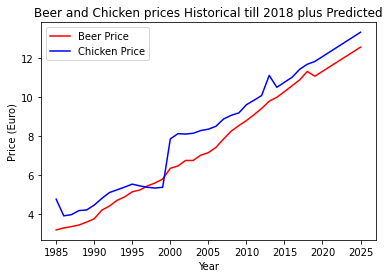

In [428]:
oktoberfest_data.head()
columns =["Year", "Mass Bier Price", "Roasted Chicken Price"]
py = [[2019],[2020],[2021],[2022],[2023],[2024],[2025]]
X = np.array(oktoberfest_data.jahr.values.reshape(-1,1))
y= np.array(oktoberfest_data.bier_preis.values.reshape(-1,1))
z = np.array(oktoberfest_data.hendl_preis.values.reshape(-1,1))
regb = LinearRegression().fit(X, y)
regb.score(X, y)


beer=pd.DataFrame(regb.predict(py))

regc = LinearRegression().fit(X, z)
regc.score(X, z)
year= pd.DataFrame(py)
chicken = pd.DataFrame(regc.predict(py))

#Saving Predictions
predictions=pd.DataFrame(columns= columns)
predictions["Year"] = year[0]
predictions["Mass Bier Price"] = beer[0]
predictions["Roasted Chicken Price"] = chicken[0]
predictions.head(10)

# Normalizing historical data
historical = pd.DataFrame(columns= columns)
historical["Year"] = oktoberfest_data.jahr.copy()
historical["Mass Bier Price"] = oktoberfest_data.bier_preis.copy()
historical["Roasted Chicken Price"] = oktoberfest_data.hendl_preis.copy()
historical.tail(10)

prices = pd.concat([historical, predictions])
prices.tail(10)
plt.title("Beer and Chicken prices Historical till 2018 plus Predicted")
plt.xlabel("Year")
plt.ylabel("Price (Euro)")
plt.plot(prices["Year"], prices["Mass Bier Price"], 'r', label="Beer Price") 
plt.plot(prices["Year"], prices["Roasted Chicken Price"], 'b',label="Chicken Price") 
plt.legend()

plt.show()

## Analyzing the less and the most crowded months (lower number of attendees )  in Museums

In [560]:

# Using museums data to predict best month in the terms of visitors for every museum
museums_data.head(3)



,ZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,month
0,Besucher/innen,Alte Pinakothek,2016,201612,15503.0,15344.0,11.89,1.04,15833.0,12
1,Besucher/innen,Alte Pinakothek,2016,201611,13856.0,13584.0,-20.81,2.00,15820.0,11
2,Besucher/innen,Alte Pinakothek,2016,201610,17498.0,22501.0,47.40,-22.23,15797.0,10


In [559]:
# Grouping and calculating how many visitors in every museum in total in particular month

museums_data["month"] = museums_data["MONAT"] - museums_data["JAHR"]*100
museums_data["month"]
columns =["month", "museum", "visitors"]
mvisitors=pd.DataFrame(columns=columns)

mvisitors["month"] = museums_data["month"].copy()
mvisitors["museum"] = museums_data["AUSPRAEGUNG"].copy()
mvisitors["visitors"] =museums_data["WERT"].copy()

#mvisitors["visitors"] =
mvisitors=mvisitors.groupby( [ mvisitors["museum"],mvisitors["month"]]).sum().reset_index()


mvisitors.tail(3)




,museum,month,visitors
129,Städtische Galerie im Lenbachhaus,10,424150.0
130,Städtische Galerie im Lenbachhaus,11,430141.0
131,Städtische Galerie im Lenbachhaus,12,425534.0


In [555]:
# Calculating the months with min and max  visitors
columns =["museum", "month_easy", "month_busy", "visitors_min", "visitors_max"]
busy_easy_museum_months1= pd.DataFrame()
busy_easy_museum_months= pd.DataFrame()

# Collecting less busy months for every museum
mn=mvisitors.groupby(  mvisitors["museum"])["visitors"].transform('min')==mvisitors ["visitors"]
busy_easy_museum_months = mvisitors[mn].copy()
busy_easy_museum_months.rename(columns={'month':"month_easy", "visitors":"visitors_min"}, inplace = True)

# Collecting most busy months for every museum
mx=mvisitors.groupby(  mvisitors["museum"])["visitors"].transform('max')==mvisitors ["visitors"]
busy_easy_museum_months1 = mvisitors[mx].copy()
busy_easy_museum_months1.rename(columns={'month':"month_busy", "visitors":"visitors_max"}, inplace = True)

# Merging Data into single table
bm=pd.merge(busy_easy_museum_months,busy_easy_museum_months1)

bm

,museum,month_easy,visitors_min,month_busy,visitors_max
0,Alte Pinakothek,9,319819.0,8,474533.0
1,Bayerisches Nationalmuseum,9,109722.0,12,308245.0
2,Deutsches Museum - Museumsinsel,11,1100457.0,8,2330174.0
3,Deutsches Museum - Verkehrszentrum,9,67830.0,8,115807.0
4,Museum Brandhorst,4,84969.0,10,153702.0
5,Museum Mensch und Natur,12,84070.0,3,182075.0
6,Münchner Stadtmuseum,8,139913.0,3,290504.0
7,Neue Pinakothek,9,232910.0,8,394217.0
8,Pinakothek der Moderne,6,360013.0,10,685313.0
9,Schackgalerie,9,8174.0,10,23256.0
